___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [2]:
import sys
!{sys.executable} -m pip install pandas_datareader

  Using cached pandas_datareader-0.9.0-py3-none-any.whl (107 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4


In [37]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [17]:
start = '2006-01-01'
end = '2016-01-01'
start

'2006-01-01'

In [22]:
BAC_symbol = 'WIKI/BAC'  # or 'BAC.US'
C_symbol = 'WIKI/C'  # or 'C.US'
GS_symbol = 'WIKI/GS'  # or 'GS.US'
JPM_symbol = 'WIKI/JPM'  # or 'JPM.US'
MS_symbol = 'WIKI/MS'  # or 'MS.US'
WFC_symbol = 'WIKI/WFC'  # or 'WFC.US'
access_key='UndkzMDoSUwTZYb2etjV'

# Bank of America
BAC = data.DataReader(BAC_symbol, 'quandl', start, end,api_key=access_key)
# Citibank
C = data.DataReader(C_symbol, 'quandl', start, end,api_key=access_key) 
# Goldman Sacs
GS = data.DataReader(GS_symbol, 'quandl', start, end,api_key=access_key)  
# JPMorgan
JPM = data.DataReader(JPM_symbol, 'quandl', start, end,api_key=access_key) 
# Morgan Stanley
MS = data.DataReader(MS_symbol, 'quandl', start, end,api_key=access_key) 
# Wells Fargo
WFC = data.DataReader(WFC_symbol, 'quandl', start, end,api_key=access_key) 

In [32]:
C

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-12-31,52.07,52.3900,51.750,51.75,11274831.0,0.00,1.0,50.846027,51.158505,50.533549,50.533549,11274831.0
2015-12-30,52.84,52.9400,52.250,52.30,8763137.0,0.00,1.0,51.597927,51.695577,51.021796,51.070621,8763137.0
2015-12-29,52.76,53.2200,52.740,52.98,10153534.0,0.00,1.0,51.519808,51.968995,51.500278,51.734637,10153534.0
2015-12-28,52.57,52.5700,51.960,52.38,8760444.0,0.00,1.0,51.334274,51.334274,50.738613,51.148740,8760444.0
2015-12-24,52.48,52.9700,52.450,52.71,4671254.0,0.00,1.0,51.246390,51.724872,51.217095,51.470983,4671254.0
2015-12-23,52.30,52.6400,52.080,52.63,14948924.0,0.00,1.0,51.070621,51.402629,50.855792,51.392864,14948924.0
2015-12-22,51.99,52.1300,51.390,52.01,13241343.0,0.00,1.0,50.767908,50.904617,50.182012,50.787438,13241343.0
2015-12-21,51.71,51.9147,51.080,51.79,16927825.0,0.00,1.0,50.494490,50.694378,49.879298,50.572609,16927825.0
2015-12-18,52.46,52.6800,51.160,51.21,25471020.0,0.00,1.0,51.226860,51.441688,49.957418,50.006243,25471020.0


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [25]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [26]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1,keys=tickers) # Concat the ticker symbols according to column

In [27]:
bank_stocks.head()

BAC                                                         \
             Open   High    Low  Close      Volume ExDividend SplitRatio   
Date                                                                       
2015-12-31  17.01  17.07  16.83  16.83  47106760.0        0.0        1.0   
2015-12-30  17.20  17.24  17.04  17.05  35035518.0        0.0        1.0   
2015-12-29  17.25  17.35  17.16  17.28  45628449.0        0.0        1.0   
2015-12-28  17.22  17.23  16.98  17.13  41759993.0        0.0        1.0   
2015-12-24  17.32  17.38  17.22  17.27  29373415.0        0.0        1.0   

                                                ...         WFC         \
              AdjOpen    AdjHigh     AdjLow     ...         Low  Close   
Date                                            ...                      
2015-12-31  16.564256  16.622684  16.388973     ...      54.220  54.36   
2015-12-30  16.749277  16.788229  16.593470     ...      54.794  54.89   
2015-12-29  16.797967  16.895347  16.710326     ...      54.990  55.29   
2015-12-28  16.768753  16.778491  16.535042     ...      54.170  54.68   
2015-12-24  16.866133  16.924561  16.768753     ...      54.710  54.82   

                                                                               \
                Volume ExDividend SplitRatio    AdjOpen    AdjHigh     AdjLow   
Date                                                                            
2015-12-31  10929420.0        0.0        1.0  51.350518  51.764921  51.077327   
2015-12-30   8016893.0        0.0        1.0  52.066467  52.104149  51.618057   
2015-12-29   7894876.0        0.0        1.0  51.915741  52.141830  51.802696   
2015-12-28   8288759.0        0.0        1.0  51.388199  51.604868  51.030225   
2015-12-24   4999417.0        0.0        1.0  51.783856  51.896900  51.538926   

                                   
             AdjClose   AdjVolume  
Date                               
2015-12-31  51.209212  10929420.0  
2015-12-30  51.708493   8016893.0  
2015-12-29  52.085308   7894876.0  
2015-12-28  51.510664   8288759.0  
2015-12-24  51.642550   4999417.0  

[5 rows x 72 columns]

** Set the column name levels (this is filled out for you):**

In [28]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [29]:
bank_stocks.head()

Bank Ticker    BAC                                                         \
Stock Info    Open   High    Low  Close      Volume ExDividend SplitRatio   
Date                                                                        
2015-12-31   17.01  17.07  16.83  16.83  47106760.0        0.0        1.0   
2015-12-30   17.20  17.24  17.04  17.05  35035518.0        0.0        1.0   
2015-12-29   17.25  17.35  17.16  17.28  45628449.0        0.0        1.0   
2015-12-28   17.22  17.23  16.98  17.13  41759993.0        0.0        1.0   
2015-12-24   17.32  17.38  17.22  17.27  29373415.0        0.0        1.0   

Bank Ticker                                      ...         WFC         \
Stock Info     AdjOpen    AdjHigh     AdjLow     ...         Low  Close   
Date                                             ...                      
2015-12-31   16.564256  16.622684  16.388973     ...      54.220  54.36   
2015-12-30   16.749277  16.788229  16.593470     ...      54.794  54.89   
2015-12-29   16.797967  16.895347  16.710326     ...      54.990  55.29   
2015-12-28   16.768753  16.778491  16.535042     ...      54.170  54.68   
2015-12-24   16.866133  16.924561  16.768753     ...      54.710  54.82   

Bank Ticker                                                          \
Stock Info       Volume ExDividend SplitRatio    AdjOpen    AdjHigh   
Date                                                                  
2015-12-31   10929420.0        0.0        1.0  51.350518  51.764921   
2015-12-30    8016893.0        0.0        1.0  52.066467  52.104149   
2015-12-29    7894876.0        0.0        1.0  51.915741  52.141830   
2015-12-28    8288759.0        0.0        1.0  51.388199  51.604868   
2015-12-24    4999417.0        0.0        1.0  51.783856  51.896900   

Bank Ticker                                    
Stock Info      AdjLow   AdjClose   AdjVolume  
Date                                           
2015-12-31   51.077327  51.209212  10929420.0  
2015-12-30   51.618057  51.708493   8016893.0  
2015-12-29   51.802696  52.085308   7894876.0  
2015-12-28   51.030225  51.510664   8288759.0  
2015-12-24   51.538926  51.642550   4999417.0  

[5 rows x 72 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [58]:
# Answer from Peridian Data

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [30]:
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 54.9
C 60.34
GS 247.92
JPM 70.08
MS 89.3
WFC 73.0


In [31]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [33]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [65]:
# Answer by Peridian

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [34]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [35]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-30,0.013072,0.010628,0.009876,0.008481,0.013203,0.009750
2015-12-29,0.013490,0.013002,0.008351,0.007208,0.009929,0.007287
2015-12-28,-0.008681,-0.011325,-0.010407,-0.010288,-0.011674,-0.011033
2015-12-24,0.008173,0.006300,0.004680,0.003314,0.009636,0.002560


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

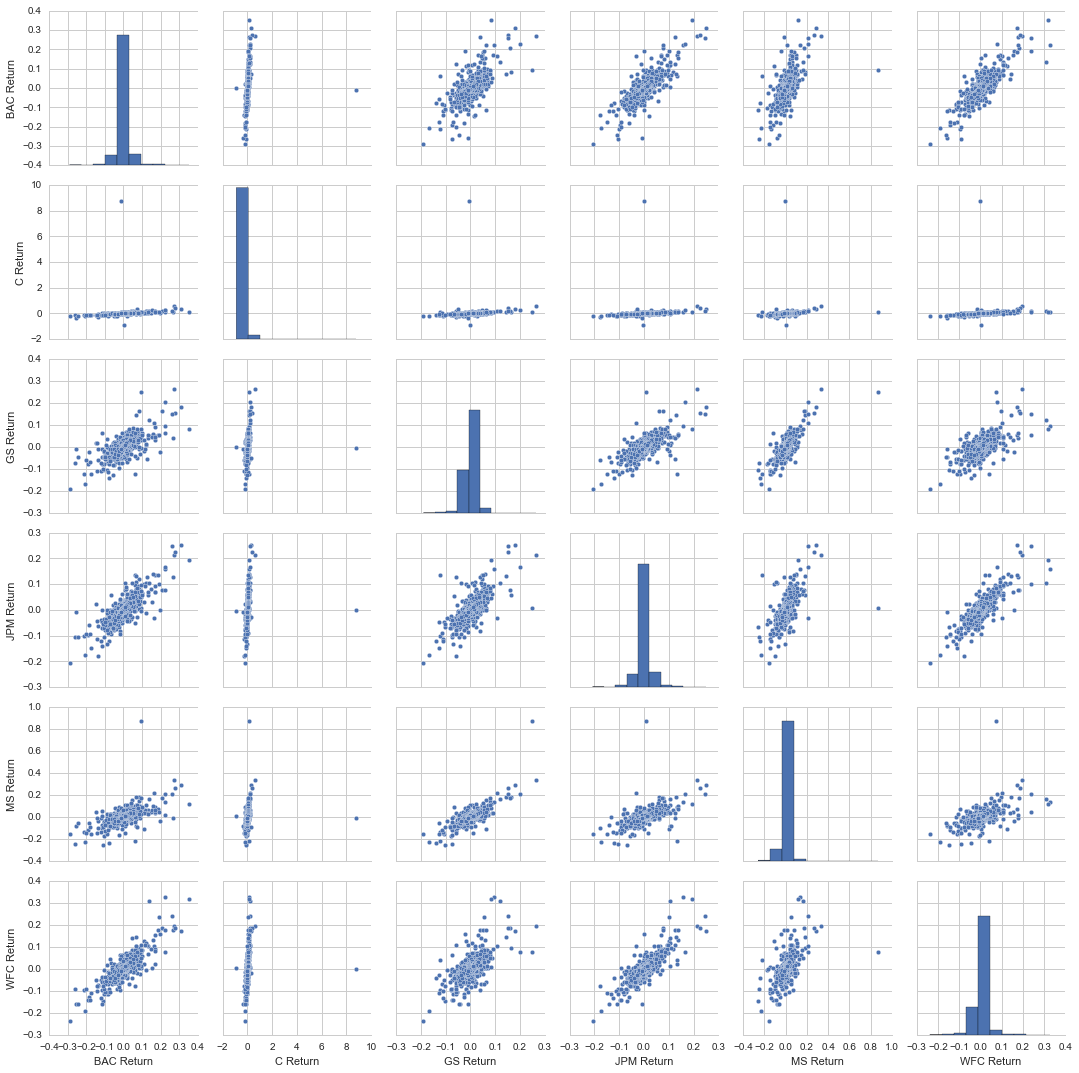

In [68]:
# Answer by Peridian

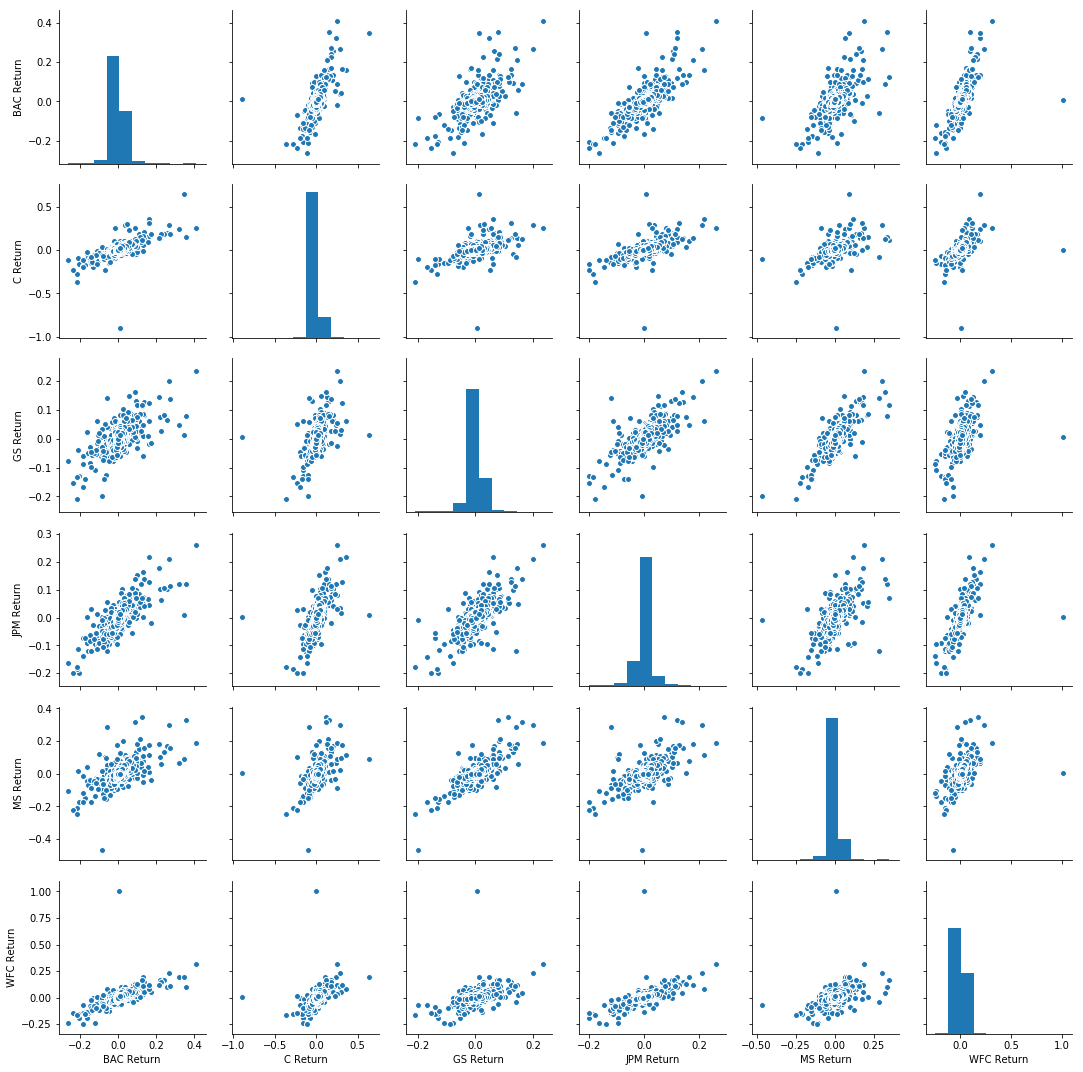

In [38]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [75]:
# Answer from Peridian Data

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [41]:
for one_return in returns:
    print(returns[one_return].argmin())

2009-04-08 00:00:00
2011-05-06 00:00:00
2008-11-21 00:00:00
2009-01-20 00:00:00
2008-10-10 00:00:00
2008-07-15 00:00:00


C:\Users\training-server\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  


In [39]:
returns.idxmin()

BAC Return   2009-04-08
C Return     2011-05-06
GS Return    2008-11-21
JPM Return   2009-01-20
MS Return    2008-10-10
WFC Return   2008-07-15
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [76]:
# Answer by Peridian

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [43]:
returns.idxmax()

BAC Return   2009-01-16
C Return     2009-02-26
GS Return    2009-01-16
JPM Return   2009-01-16
MS Return    2008-10-08
WFC Return   2006-08-11
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [81]:
# Answer by Peridian Data

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [44]:
returns.std()

BAC Return    0.037062
C Return      0.043327
GS Return     0.025155
JPM Return    0.027392
MS Return     0.035599
WFC Return    0.035655
dtype: float64

In [88]:
# Answer by Peridian

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [55]:
returns.loc['2015-12-31':'2015-01-01'].std()

BAC Return    0.016216
C Return      0.015376
GS Return     0.014152
JPM Return    0.014088
MS Return     0.016353
WFC Return    0.012650
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



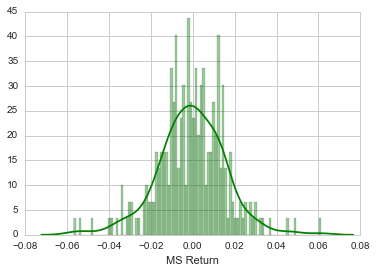

In [94]:
# Answer by Peridian

C:\Users\training-server\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


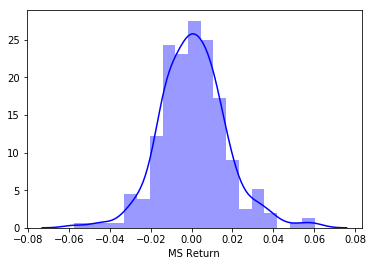

In [58]:
sns.distplot(returns.loc['2015-12-30':'2015-01-01']['MS Return'], color='blue')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



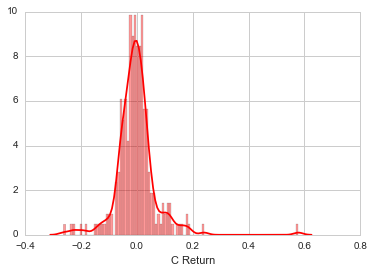

In [98]:
# Answer by Peridian

C:\Users\training-server\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


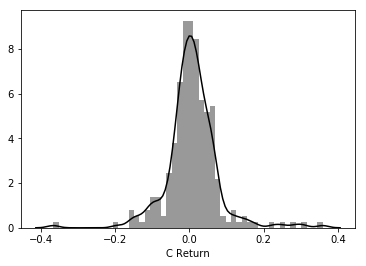

In [59]:
sns.distplot(returns.loc['2008-12-31':'2008-01-01']['C Return'], color='black',bins=50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

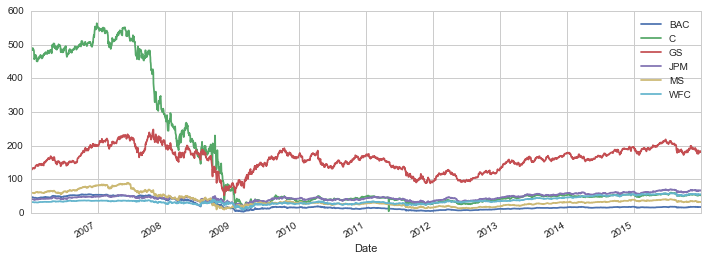

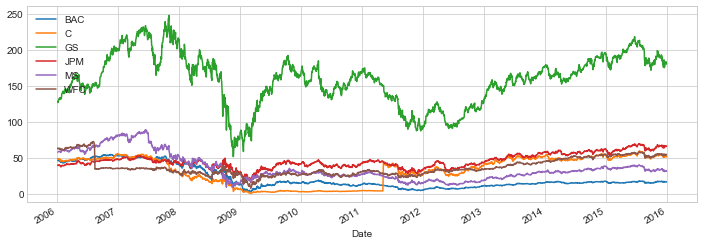

In [61]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

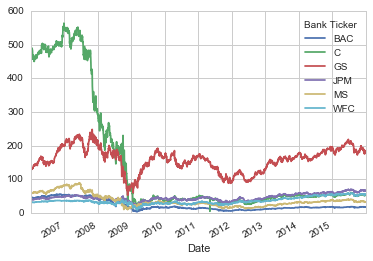

In [18]:
# Answer by Peridian

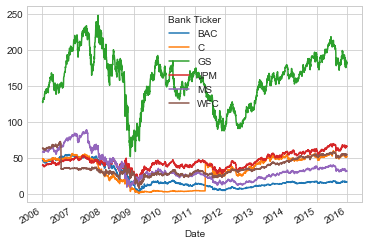

In [62]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [63]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

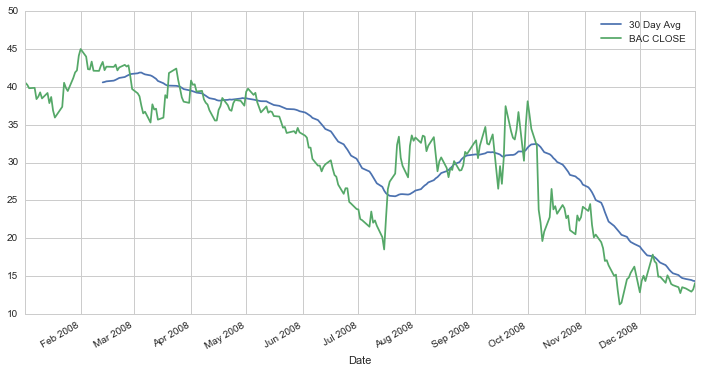

In [141]:
# Answer by Peridian Data

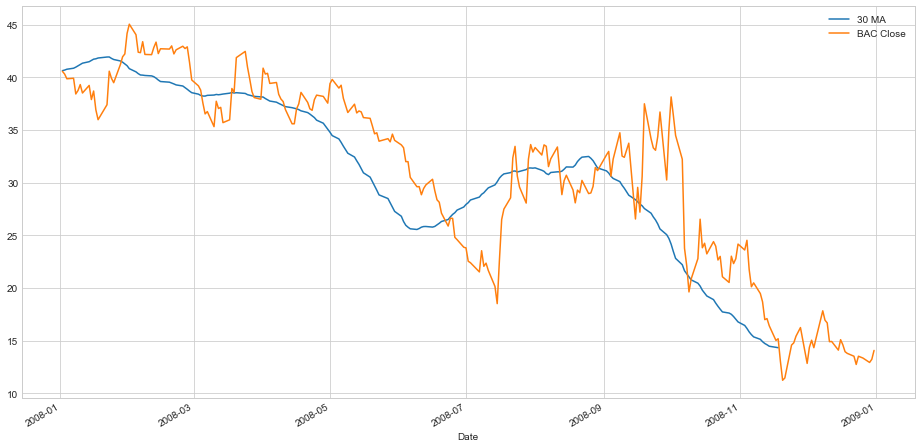

In [67]:
plt.figure(figsize=(16,8))
BAC['Close'].loc['2009-01-01':'2008-01-01'].rolling(window=30).mean().plot(label='30 MA')
BAC['Close'].loc['2009-01-01':'2008-01-01'].plot(label='BAC Close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

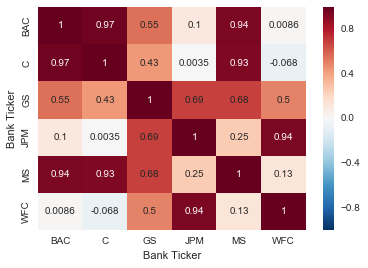

In [41]:
# Answer by Peridian Data

In [72]:
# Heatmap
bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr() # Level will be on the top left, can use 1 also

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.363303,0.550936,0.103855,0.944219,0.276687
C,0.363303,1.000000,0.426868,0.700735,0.449794,0.723474
GS,0.550936,0.426868,1.000000,0.685347,0.683830,0.359021
JPM,0.103855,0.700735,0.685347,1.000000,0.250410,0.697574
MS,0.944219,0.449794,0.683830,0.250410,1.000000,0.331510
WFC,0.276687,0.723474,0.359021,0.697574,0.331510,1.000000


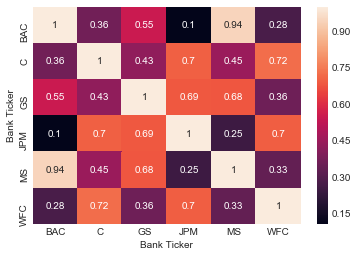

In [75]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

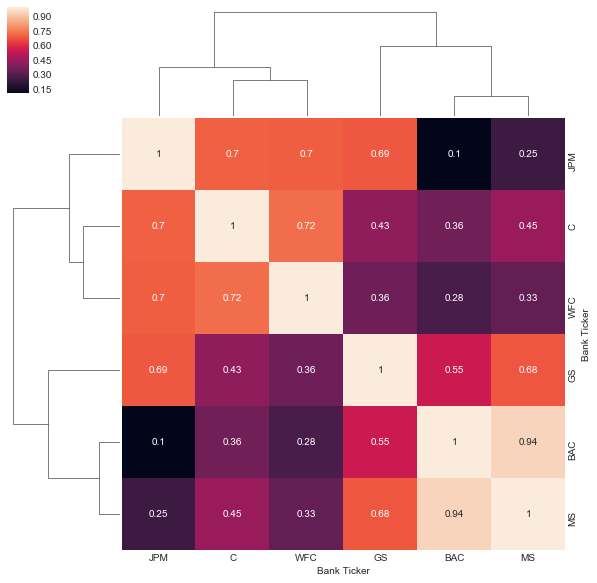

In [76]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [77]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [80]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [82]:
bac_c = BAC[['Open', 'High', 'Low', 'Close']].loc['2016-01-01':'2015-01-01']
bac_c.iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [84]:
MS_sma = MS['Close'].loc['2016-01-01':'2015-01-01']
MS_sma.ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [86]:
BAC['Close'].loc['2016-01-01':'2015-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.